# Data preparation pipeline

## Imports & loading dataset

### Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

### Dataset loading

In [38]:
# load the training dataset
# if necessary download the file
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
dataset = pd.read_csv('diabetes.csv')


In [5]:
dataset.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


## Visualization

In [21]:
dataset.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Diabetic_Encoded,PlasmaGlucose_groups,DogAge
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,No,Exp,3.000000
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,No,Med,3.285714
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,No,High,3.285714
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1,Yes,Med,6.142857
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0,No,Med,3.142857


In [22]:
dataset.describe(include='all')

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Diabetic_Encoded,PlasmaGlucose_groups,DogAge
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000,15000,15000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Low,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000,3806,NaN
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333,NaN,NaN,4.305390
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420,NaN,NaN,1.727100
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000,NaN,NaN,3.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000,NaN,NaN,3.142857
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000,NaN,NaN,3.428571
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000,NaN,NaN,5.000000


In [13]:
print(dataset.dtypes)

PatientID                    int64
Pregnancies                  int64
PlasmaGlucose                int64
DiastolicBloodPressure       int64
TricepsThickness             int64
SerumInsulin                 int64
BMI                        float64
DiabetesPedigree           float64
Age                          int64
Diabetic                     int64
Diabetic_Encoded            object
PlasmaGlucose_groups      category
DogAge                     float64
dtype: object


<AxesSubplot:>

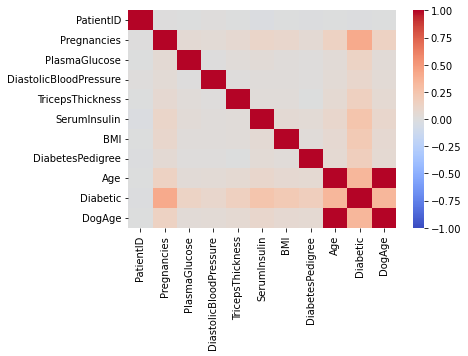

In [14]:
# Plot the heatmap and annotation on it
dataset_correlation = dataset.corr()
sns.heatmap(dataset_correlation, xticklabels=dataset_correlation.columns, yticklabels=dataset_correlation.columns, cmap='coolwarm', vmin=-1, vmax = 1)

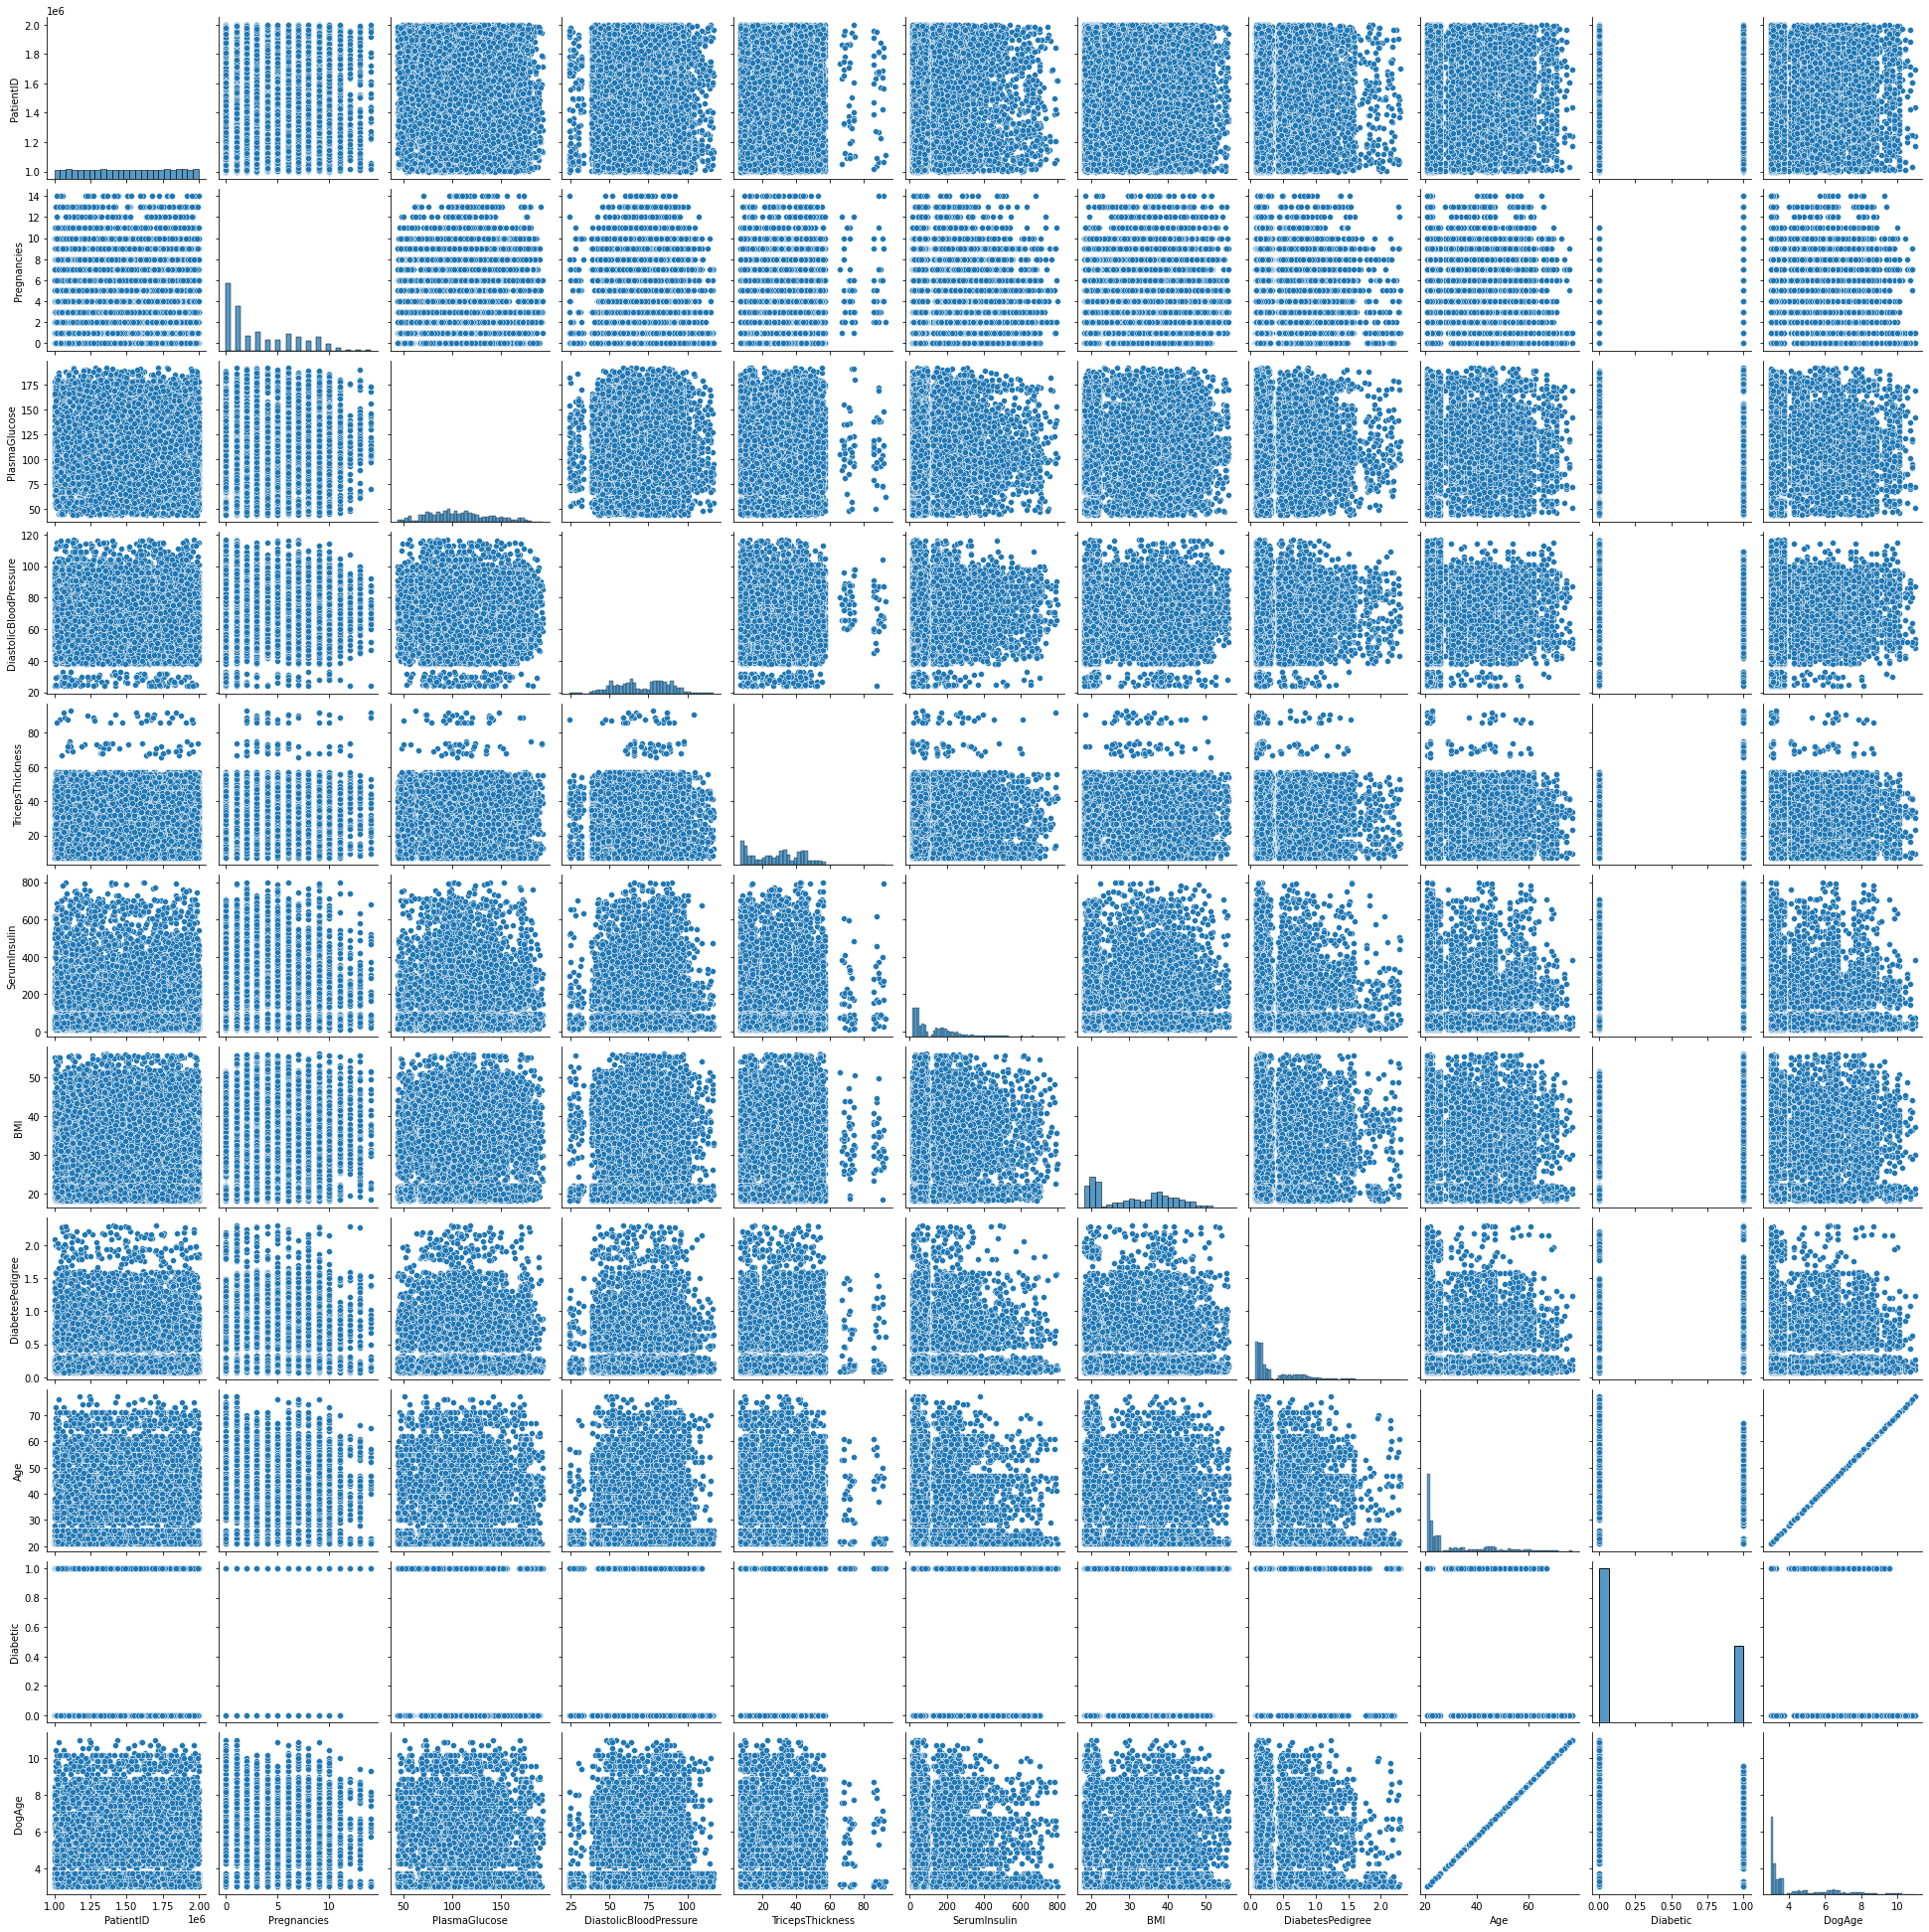

In [15]:
# Pair plot of all variables
sns.pairplot(dataset)

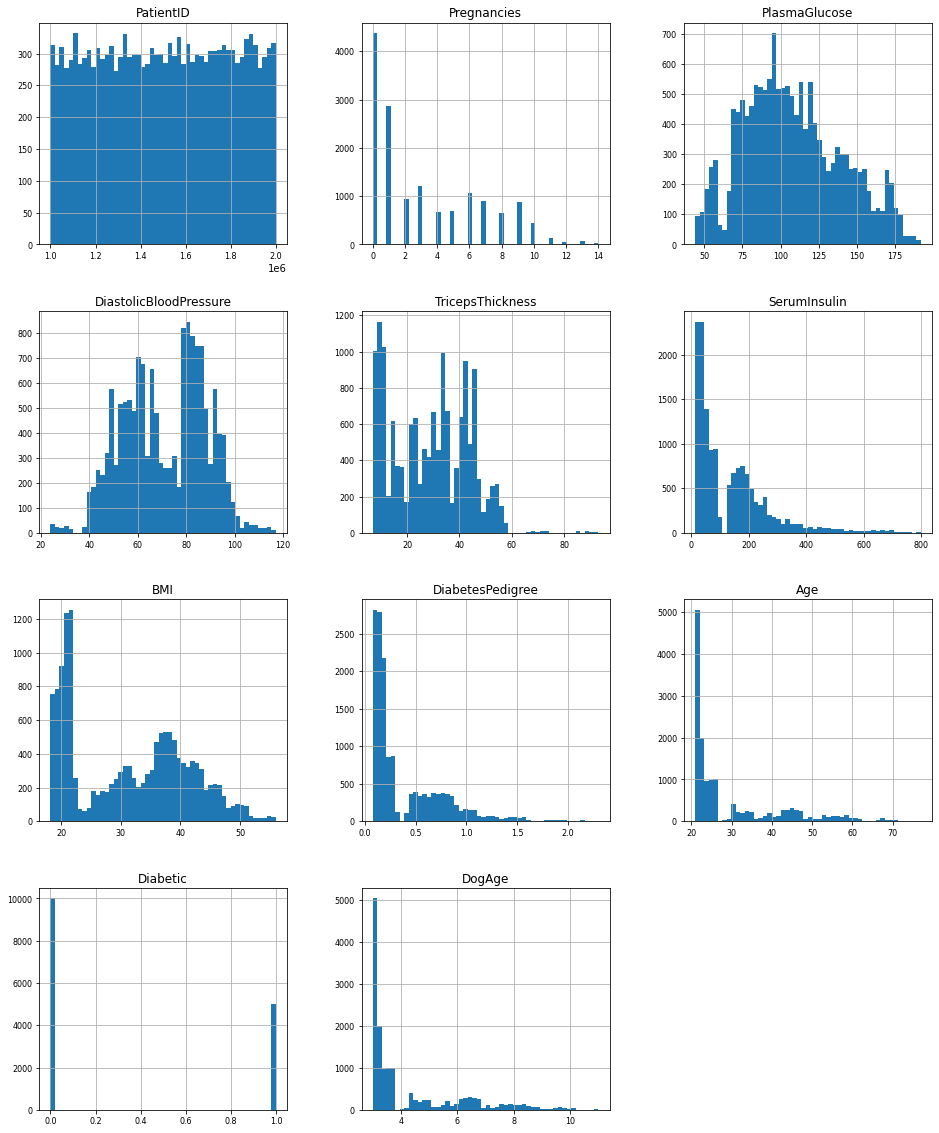

In [16]:
# listing dataframes types
list(set(dataset.dtypes.tolist()))
# include only float and integer
df_num = dataset.select_dtypes(include = ['float64', 'int64', 'UInt32'])
# display what has been selected
df_num.head()
# plot
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

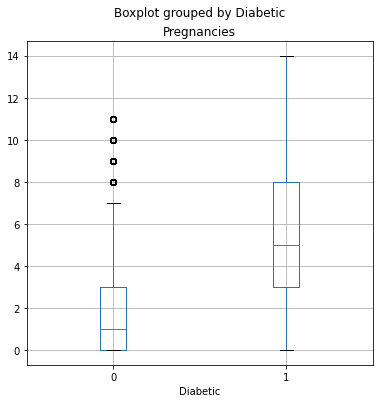

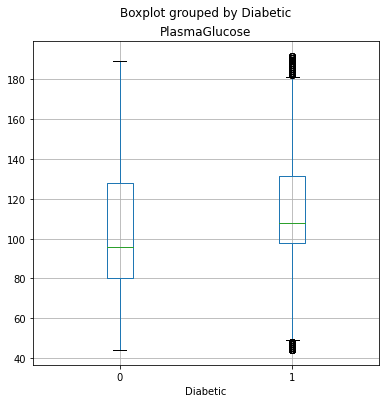

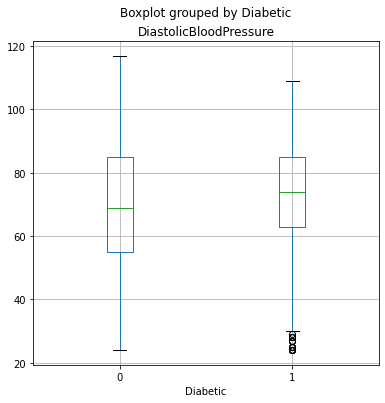

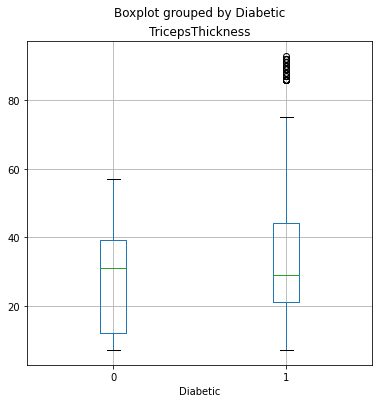

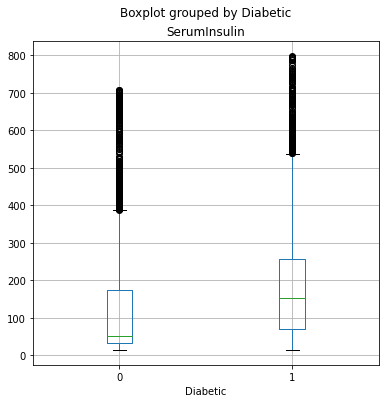

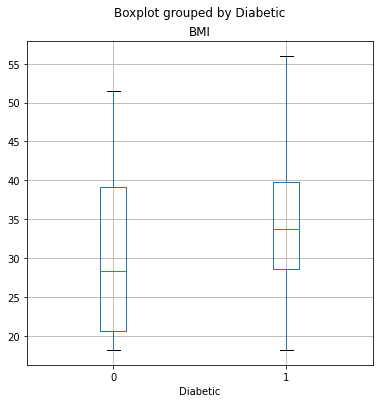

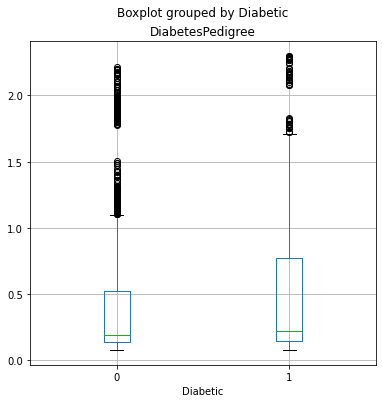

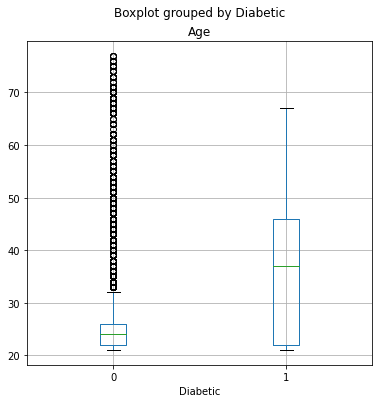

In [17]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    dataset.boxplot(column=col, by='Diabetic', figsize=(6,6))
    plt.title(col)
plt.show()

## Rows

### Remove duplicates

In [ ]:
# Removes duplicate rows based on all columns.
dataset = dataset.drop_duplicates()

In [ ]:
# To remove duplicates on specific column(s), use subset.
dataset = dataset.drop_duplicates(subset=['Pregnancies'])

In [ ]:
# To remove duplicates and keep last occurrences, use keep.
dataset = dataset.drop_duplicates(subset=['Pregnancies', 'DiastolicBloodPressure'], keep='last')

### Drop NAs

In [ ]:
# Drop the rows where at least one element is missing.
dataset = dataset.dropna()

In [ ]:
# Drop the columns where at least one element is missing.
dataset = dataset.dropna(axis='columns')

In [ ]:
# Drop the rows where all elements are missing.
dataset = dataset.dropna(how='all')

In [ ]:
# Keep only the rows with at least 2 non-NA values.
dataset = dataset.dropna(thresh=2)

In [ ]:
# Define in which columns to look for missing values.
dataset.dropna(subset=['Diabetic'])

### Outlier removal

In [ ]:
# Normal distributions : Using Standard deviation
print("Number of rows before removing outliers : {}".format(dataset.shape[0]))
print()

columns_to_clean = ['Pregnancies']
for column_to_clean in columns_to_clean:
    upper_limit = dataset[column_to_clean].mean() + 3 * dataset[column_to_clean].std()
    lower_limit = dataset[column_to_clean].mean() - 3 * dataset[column_to_clean].std()
    dataset = dataset[(dataset[column_to_clean] > lower_limit) & (dataset[column_to_clean] < upper_limit)]
    
print("Number of rows AFTER removing outliers : {}".format(dataset.shape[0]))
print()

In [ ]:
# Skewed distributions : Using Inter-Quartile Range (IQR)
print("Number of rows before removing outliers : {}".format(dataset.shape[0]))
print()

columns_to_clean = ['Pregnancies']
for column_to_clean in columns_to_clean:
    percentile25 = dataset['column_to_clean'].quantile(0.25)
    percentile75 = dataset['column_to_clean'].quantile(0.75)
    iqr = percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    dataset = dataset[(dataset[column_to_clean] > lower_limit) & (dataset[column_to_clean] < upper_limit)]
    
print("Number of rows AFTER removing outliers : {}".format(dataset.shape[0]))
print()

In [ ]:
# Other distributions : Using Winsorization
print("Number of rows before removing outliers : {}".format(dataset.shape[0]))
print()

columns_to_clean = ['Pregnancies']
for column_to_clean in columns_to_clean:
    upper_limit = dataset['column_to_clean'].quantile(0.99)
    lower_limit = dataset['column_to_clean'].quantile(0.01)
    dataset = dataset[(dataset[column_to_clean] > lower_limit) & (dataset[column_to_clean] < upper_limit)]
    
print("Number of rows AFTER removing outliers : {}".format(dataset.shape[0]))
print()

In [ ]:
# Isolation Forest
columns_to_clean = dataset.columns[1:3]
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(dataset[columns_to_clean])
pred = clf.predict(dataset[columns_to_clean])
dataset['anomaly']=pred
outliers=dataset.loc[dataset['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(dataset['anomaly'].value_counts())
dataset = dataset[dataset['anomaly'] != -1]

In [ ]:
# Minimum Covariance Determinant
from sklearn.covariance import EllipticEnvelope
# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(dataset[columns_to_clean])
dataset['anomaly']=yhat
outliers=dataset.loc[dataset['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(dataset['anomaly'].value_counts())
dataset = dataset[dataset['anomaly'] != -1]

### Data sampling

In [19]:
sample = dataset['Pregnancies'].sample(n=3, random_state=1)
sample.head()

7576     1
10509    3
4253     7
Name: Pregnancies, dtype: int64

## Columns

### Renaming columns

In [ ]:
dataset = dataset.rename(columns = {'Pregnancies':'Pregnancies_status', 'DiastolicBloodPressure':'BloodPressure'})

### Feature Selection

In [ ]:
# Drop designated columns
useless_cols = ['Pregnancies','DiastolicBloodPressure']

print("Dropping useless columns...")
dataset = dataset.drop(useless_cols, axis=1) # axis = 1 indicates that we are dropping along the column axis

print("...Done.")
print(dataset.head())

In [ ]:
# Drop correlated columns

# Create correlation matrix
corr_matrix = dataset.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
dataset.drop(to_drop, axis=1, inplace=True)

### Features engineering

#### Label encoding

In [6]:
# Label encoding
dataset['Diabetic_Encoded']  = dataset['Diabetic'].replace({1: 'Yes', 0: 'No'})

#### Binning

In [9]:
# Binning with quantiles

# ex: four groups
groups = ['Low', 'Med', 'High', 'Exp']

dataset['PlasmaGlucose_groups'] = pd.qcut(dataset['PlasmaGlucose'], q=4, labels=groups)
dataset[['PlasmaGlucose', 'PlasmaGlucose_groups']].head()

,PlasmaGlucose,PlasmaGlucose_groups
0,171,Exp
1,92,Med
2,115,High
3,103,Med
4,85,Med


In [27]:
#Binning manually defining bins

#define bins 
bins = [0, 70, 140, 210, 280]

#name of groups
groups = ['Low', 'Med', 'High', 'Exp']

dataset['PlasmaGlucose_groups'] = pd.cut(dataset['PlasmaGlucose'], bins=bins, labels=groups)

dataset[['PlasmaGlucose', 'PlasmaGlucose_groups']].head()

,PlasmaGlucose,PlasmaGlucose_groups
0,171,High
1,92,Med
2,115,Med
3,103,Med
4,85,Med


#### Lambda function

In [11]:
dataset['DogAge'] = dataset['Age'].apply(lambda x: x/7)
dataset[['DogAge', 'Age']].head()

,DogAge,Age
0,3.000000,21
1,3.285714,23
2,3.285714,23
3,6.142857,43
4,3.142857,22


### One Hot Encoding / Dummy encode

In [37]:
# One Hot Encoding using pandas
# !!! Careful !!! this example uses the PlasmaGlucose_groups categorical variable created in Binning section
# groups = ['Low', 'Med', 'High', 'Exp']
# dataset['PlasmaGlucose_groups'] = pd.qcut(dataset['PlasmaGlucose'], q=4, labels=groups)
# dataset[['PlasmaGlucose', 'PlasmaGlucose_groups']].head()
dataset = dataset.join(pd.get_dummies(dataset['PlasmaGlucose_groups'], prefix='Plasmagroup_'))
dataset.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,PlasmaGlucose_groups,Plasmagroup__Low,Plasmagroup__Med,Plasmagroup__High,Plasmagroup__Exp
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,Exp,0,0,0,1
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,Med,0,1,0,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,High,0,0,1,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1,Med,0,1,0,0
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0,Med,0,1,0,0


In [39]:
# Dummy Encoding using pandas
# !!! Careful !!! this example uses the PlasmaGlucose_groups categorical variable created in Binning section
# groups = ['Low', 'Med', 'High', 'Exp']
# dataset['PlasmaGlucose_groups'] = pd.qcut(dataset['PlasmaGlucose'], q=4, labels=groups)
# dataset[['PlasmaGlucose', 'PlasmaGlucose_groups']].head()
dataset = dataset.join(pd.get_dummies(dataset['PlasmaGlucose_groups'], prefix='Plasmagroup_', drop_first=True))
dataset.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,PlasmaGlucose_groups,Plasmagroup__Med,Plasmagroup__High,Plasmagroup__Exp
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,Exp,0,0,1
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,Med,1,0,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,High,0,1,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1,Med,1,0,0
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0,Med,1,0,0


## Values

### Data Scaling

#### Normalize

<AxesSubplot:>

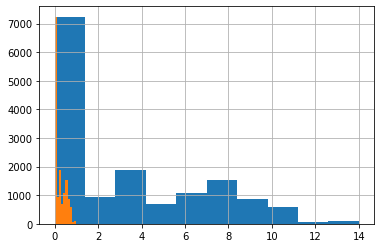

In [33]:
# Min-Max normalization
dataset['Pregnancies_normalized']=(dataset['Pregnancies']-dataset['Pregnancies'].min())/(dataset['Pregnancies'].max()-dataset['Pregnancies'].min())
dataset['Pregnancies'].hist()
dataset['Pregnancies_normalized'].hist()

#### Standardize

<AxesSubplot:>

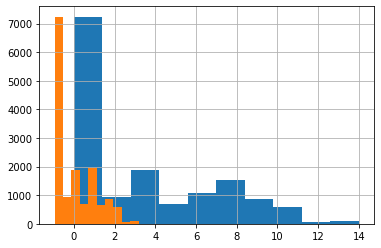

In [34]:
# Mean standardization
dataset['Pregnancies_normalized']=(dataset['Pregnancies']-dataset['Pregnancies'].mean())/dataset['Pregnancies'].std()
dataset['Pregnancies'].hist()
dataset['Pregnancies_normalized'].hist()

#### Robust

<AxesSubplot:>

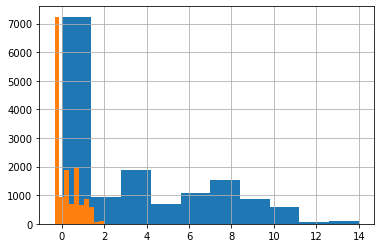

In [32]:
# Mean standardization
dataset['Pregnancies_normalized']=(dataset['Pregnancies']-dataset['Pregnancies'].median())/(dataset['Pregnancies'].quantile(0.75)-dataset['Pregnancies'].quantile(0.25))
dataset['Pregnancies'].hist()
dataset['Pregnancies_normalized'].hist()

### Change Distribution

#### Discretize

#### Quantile

#### Power (ex : Box-Cox, Yeo-Johnson)

### Imputation

## Columns + Values : Dimensionality reduction

### Manifold Learning

#### SOM

#### tSNE

### LDA

### Matrix Factorization

#### PCA

#### SVD

## Rows + Values : Row consolidation